**Importing libraries**

In [2]:
import pandas as pd
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve,auc )
#Importing models
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.naive_bayes import GaussianNB # Gaussain Naive Bayes
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV # grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # randomized search cross validation



**Importing** **Data**

In [57]:
dataset = pd.read_csv("/content/PAYSIM DATA.csv")

**EXPLORATORY DATA ANALYSIS**

In [58]:
#check shape of the dataset
dataset.shape

(1280499, 11)

In [59]:
#print first 5 rows
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [60]:
#dataset summary statistics
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.280499e+06,1.280499e+06,1.280498e+06,1.280498e+06,1.280498e+06,1.280498e+06,1.280498e+06,1280498.0
mean,4.555897e+01,1.629530e+05,8.753618e+05,8.958151e+05,9.861776e+05,1.118442e+06,1.204219e-03,0.0
std,4.212963e+01,2.734228e+05,2.974531e+06,3.010888e+06,2.305078e+06,2.417105e+06,3.468097e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.600000e+01,1.282232e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,3.500000e+01,7.842198e+04,1.554500e+04,0.000000e+00,1.294892e+05,2.232652e+05,0.000000e+00,0.0
75%,4.400000e+01,2.184391e+05,1.304279e+05,1.710595e+05,9.289908e+05,1.157453e+06,0.000000e+00,0.0
max,1.350000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.220740e+07,4.220740e+07,1.000000e+00,0.0


In [61]:
#check data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280499 entries, 0 to 1280498
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1280499 non-null  int64  
 1   type            1280499 non-null  object 
 2   amount          1280499 non-null  float64
 3   nameOrig        1280499 non-null  object 
 4   oldbalanceOrg   1280498 non-null  float64
 5   newbalanceOrig  1280498 non-null  float64
 6   nameDest        1280498 non-null  object 
 7   oldbalanceDest  1280498 non-null  float64
 8   newbalanceDest  1280498 non-null  float64
 9   isFraud         1280498 non-null  float64
 10  isFlaggedFraud  1280498 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 107.5+ MB


In [62]:
#check for null values
for col in dataset.columns:
    if (dataset[col].isnull().sum() > 0):
        print(col)

oldbalanceOrg
newbalanceOrig
nameDest
oldbalanceDest
newbalanceDest
isFraud
isFlaggedFraud


In [63]:
# check number of Fraudulent Transactions
len(dataset[dataset['isFraud']==1])

1542

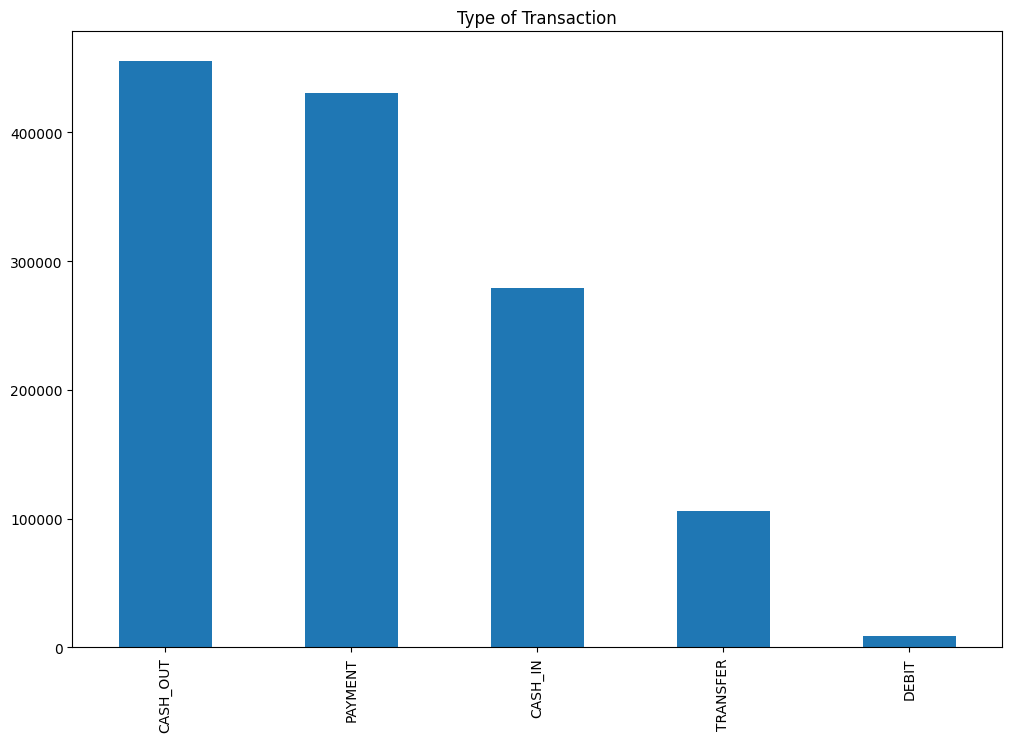

In [64]:
#plotting number of transactions per type
f, ax = plt.subplots(1,1, figsize=(8,8))
# plotting the number of different types of values present in type column
dataset.type.value_counts().plot(kind='bar',
        title="Type of Transaction", ax=ax, figsize=(12,8))
plt.show()

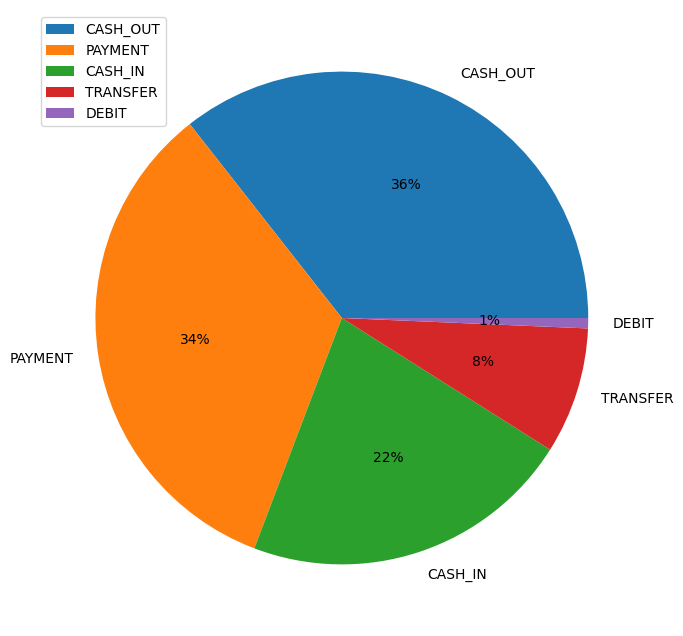

In [65]:
#Proportion of type of Transactions
type = dataset['type'].value_counts()
transaction = type.index
count = type.values

# drawing piechart
plt.figure(figsize=(8,8))
plt.pie(count, labels=transaction, autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()

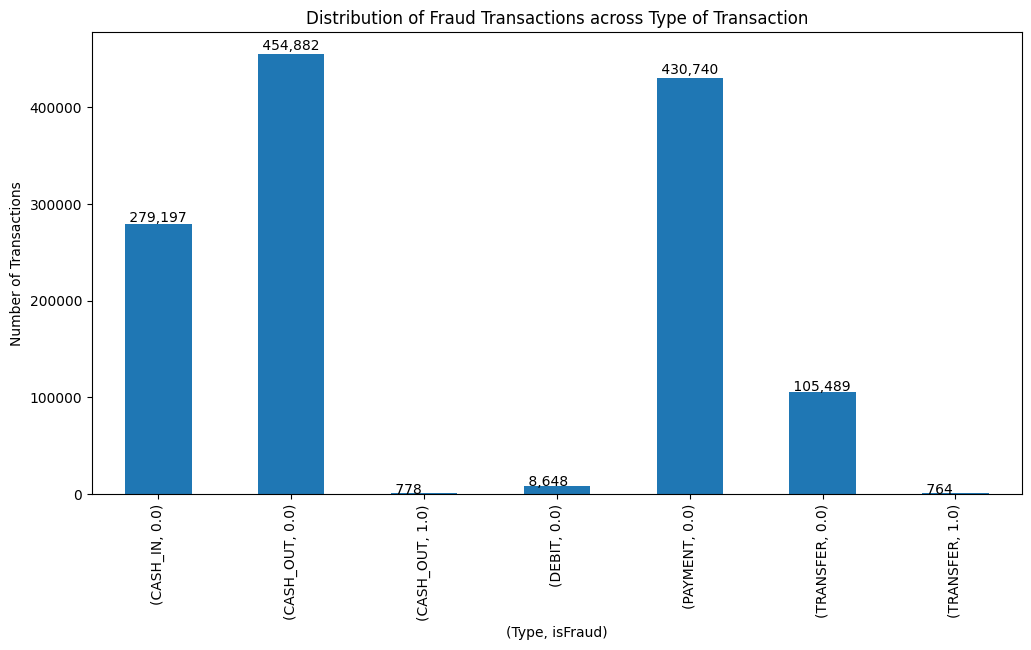

In [66]:
#Distribution plot for Fraud Transactions across Type of Transaction
from matplotlib.pyplot import figure
# setting the size of figure
figure(figsize=(12, 6))
# grouping data points based on the values present in columns "type" and target variable "is_fraud"
ax = dataset.groupby(['type', 'isFraud']).size().plot(kind='bar')
# setting the title of plot
ax.set_title("Distribution of Fraud Transactions across Type of Transaction")
# setting the label name of x label
ax.set_xlabel("(Type, isFraud)")
# setting the label name of y label
ax.set_ylabel("Number of Transactions")
# getting the height of each and every bar plot, and annotating the plot with that value
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ' ,d')),
                (p.get_x(), p.get_height()*1.01))

1. The distribution plot shows that only Cash_out and Transfer have fraudulent transactions
2.   This might mean the mode of operation is by transfering money in to a certain account and then cashing it out from the other account.




In [67]:
#check whether fraud occurs using specific destination account
datasetA=dataset[(dataset['isFraud']==1) & (dataset['type']=='TRANSFER')]
datasetA['nameDest'].value_counts()

C553264065     1
C1828683068    1
C600417404     1
C944240643     1
C43114733      1
              ..
C203170379     1
C1679122685    1
C927108992     1
C735323689     1
C1873143762    1
Name: nameDest, Length: 764, dtype: int64

In [68]:
datasetB=dataset[(dataset['isFraud']==1) & (dataset['type']=='CASH_OUT')]
datasetB['nameOrig'].value_counts()

C840083671     1
C202343880     1
C1518895613    1
C942925545     1
C824646662     1
              ..
C1825250063    1
C2052172437    1
C321872585     1
C330892703     1
C1386605683    1
Name: nameOrig, Length: 778, dtype: int64

The analysis clearly shows that there are no specific accounts through which fraud occurs and thus we have cleared our suspicion and the two features are not useful to our current modelling

In [69]:
#checking whether the recipient account of a fraudulent transfer was used as a sending account for cashing out
fraud = dataset[dataset["isFraud"] == 1]
valid = dataset[dataset["isFraud"] == 0]

fraud_transfer = fraud[fraud["type"] == "TRANSFER"]
fraud_cashout = fraud[fraud["type"] == "CASH_OUT"]

fraud_transfer.nameDest.isin(fraud_cashout.nameOrig).any()

False

No account used in a fraudulent transfer transction was used in a fraudulent cash_out transaction



Text(0.5, 1.0, 'oldbalanceDest vs Fraud')

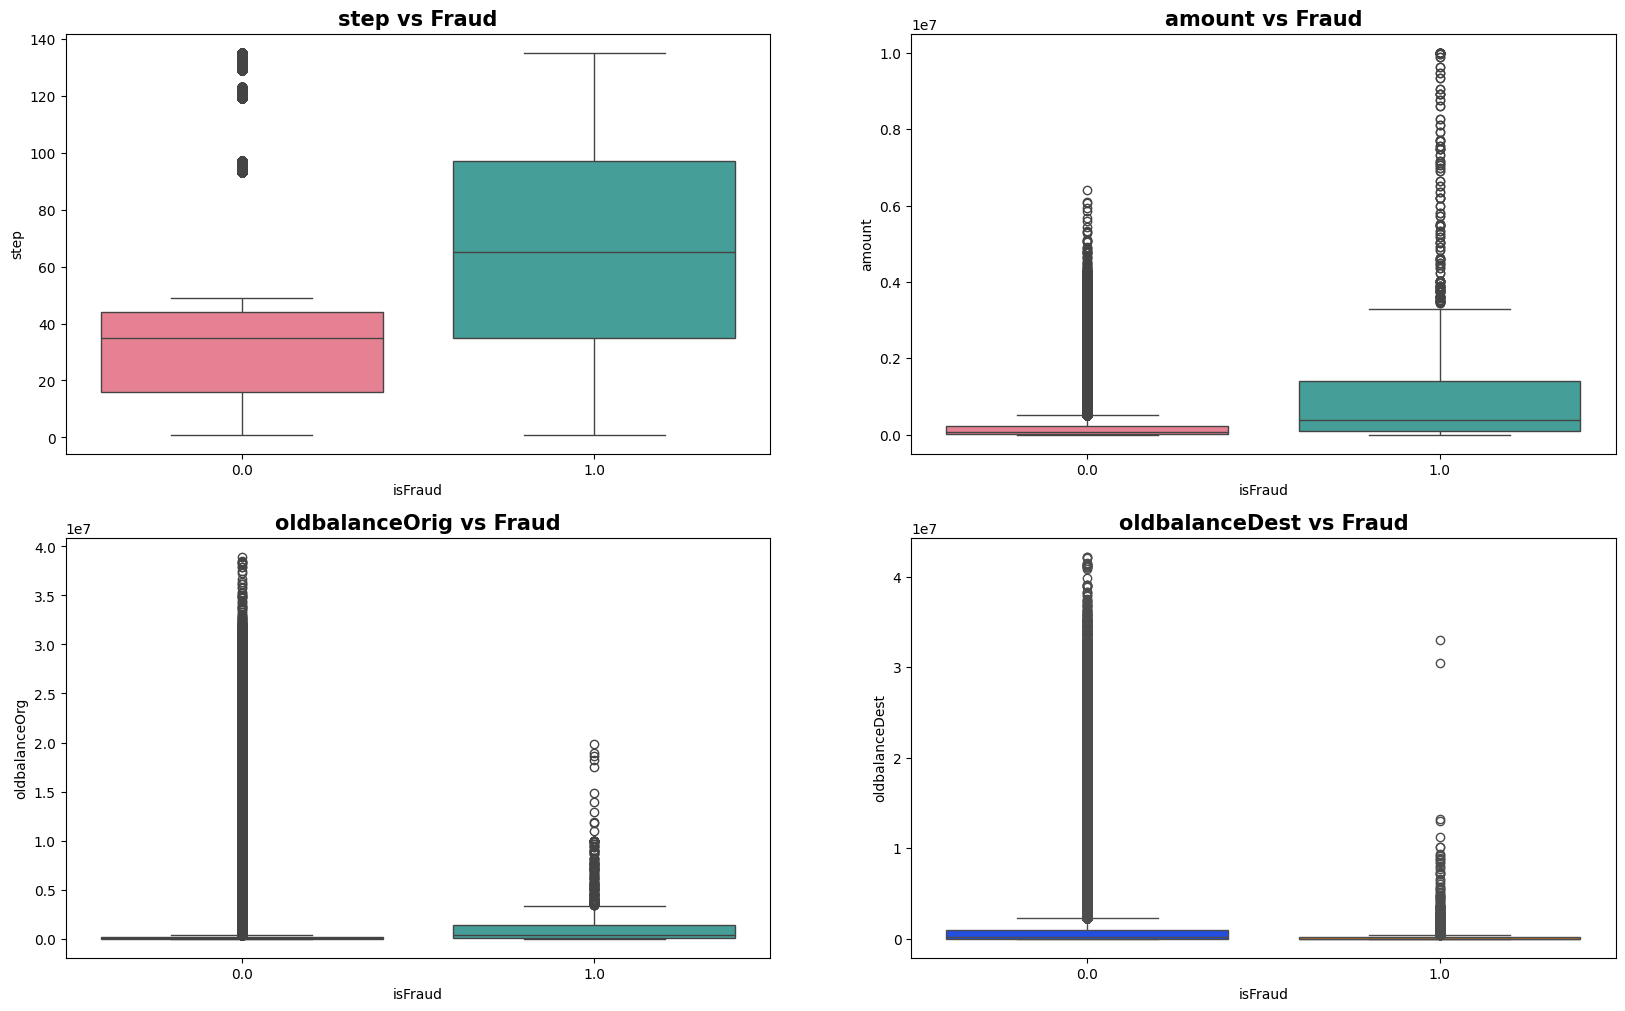

In [70]:
#Plotting numeric variables against fraud
#Boxplots used for this visualization
import seaborn as sns

plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'isFraud', y = 'step', data = dataset, palette="husl", hue='isFraud', legend=False)
plt.title('step vs Fraud',fontweight="bold", size=15)
plt.subplot(2,2,2)
sns.boxplot(x = 'isFraud', y = 'amount', data = dataset,palette="husl", hue='isFraud', legend=False)
plt.title('amount vs Fraud',fontweight="bold", size=15)
plt.subplot(2,2,3)
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = dataset, palette= 'husl', hue='isFraud', legend=False)
plt.title('oldbalanceOrig vs Fraud',fontweight="bold", size=15)
plt.subplot(2,2,4)
sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data = dataset,palette="bright", hue='isFraud', legend=False)
plt.title('oldbalanceDest vs Fraud',fontweight="bold", size=15)

In [71]:
#orig_cus_name_initial - it stores first letter of the customer name. If it is "C" -> then the original customer is a customer, if it is "M" -> then the original customer is a merchant.
#rec_cus_name_initial - it stores first letter of receiving customer name.
dataset['orig_cus_name_initial'] = dataset['nameOrig'].astype(str).str[0]
dataset['rec_cus_name_initial'] = dataset['nameDest'].astype(str).str[0]

In [72]:
#check original customer unique values
dataset['orig_cus_name_initial'].value_counts()

C    1280499
Name: orig_cus_name_initial, dtype: int64

In [73]:
#check receiving customer unique values
dataset['rec_cus_name_initial'].value_counts()

C    849758
M    430740
n         1
Name: rec_cus_name_initial, dtype: int64

In [74]:
# Drop the row where rec_cus_name_initial is 'n'
dataset = dataset[dataset['rec_cus_name_initial'] != 'n']

In [75]:
#check the largest fraudulent amount
dataset[dataset['isFraud']==1]['amount'].max()

10000000.0

In [76]:
#check the smallest fraudulent amount
dataset[dataset['isFraud']==1]['amount'].min()

119.0

In [77]:
# checking for balances before and after transactions
wrong_orig_bal = sum(dataset["oldbalanceOrg"] - dataset["amount"] != dataset["newbalanceOrig"])
wrong_dest_bal = sum(dataset["newbalanceDest"] + dataset["amount"] != dataset["newbalanceDest"])
print("Percentage of entries with balance errors in the account making a transfer: ", 100*round(wrong_orig_bal/len(dataset),2))
print("Percentage of entries with balance errors in the account receiving money: ", 100*round(wrong_dest_bal/len(dataset),2))

Percentage of entries with balance errors in the account making a transfer:  85.0
Percentage of entries with balance errors in the account receiving money:  100.0


Almost all transaction have errors in their balances before and after transactions. We do not have a clue on the cause of these errors thus we won't be treating them

<ipython-input-78-0243fd9d4547>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


<Axes: >

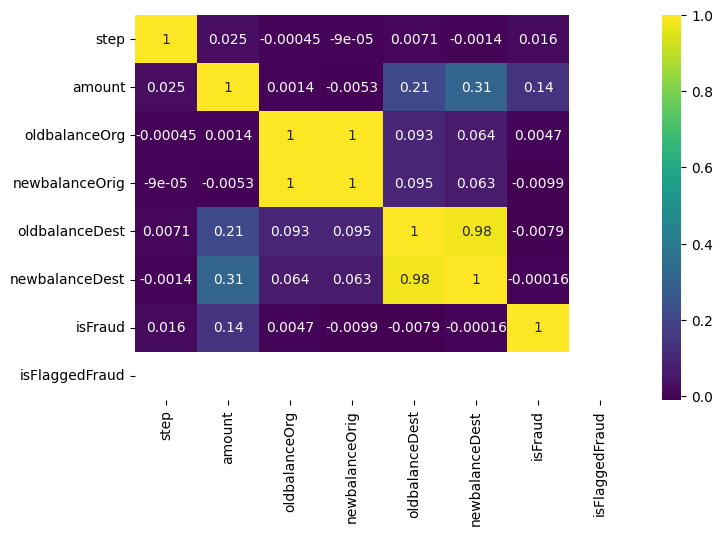

In [78]:
#plot a heatmap to correlation between variables
fig, ax = plt.subplots(figsize=(8,5))
corr = dataset.corr()
sns.heatmap(corr, cmap="viridis", annot=True)

**DATA CLEANING**

Data Exploration showed us that fraud occurs on **Transfer** and **CashOut** transactions, so we assemble only the corresponding data in X for analysis

In [79]:
my_data = dataset.loc[(dataset.type == 'TRANSFER') | (dataset.type == 'CASH_OUT')]
# y is the target variable
Y = my_data['isFraud']
# X contains the input
X = my_data.drop(columns=['isFraud'])
# Dropping categorical and useless column from input features
X = X.drop(columns= ['nameOrig', 'nameDest',
                     'isFlaggedFraud'])
# Encoding "type" column. Whenever type == Transfer, it is 1 else it is 0
X['type'] = np.where(X['type']=='TRANSFER', 0, 1)
# Converting this categorical column to integer type
X['type'] = X['type'].astype(int)

In [80]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,orig_cus_name_initial,rec_cus_name_initial
2,1,0,181.00,181.0,0.0,0.0,0.00,C,C
3,1,1,181.00,181.0,0.0,21182.0,0.00,C,C
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,C,C
19,1,0,215310.30,705.0,0.0,22425.0,0.00,C,C
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,C,C


In [81]:
#drop this feature as it is consistent accross all the data and will not have anymore impact in improving the model
X = X.drop(columns=['orig_cus_name_initial'])

In [83]:
# set receiving customer name starting with C to 0, else 1
X['rec_cus_name_initial'] = np.where(X['rec_cus_name_initial']=='C', 0, 1)
# Converting this categorical feature to numerical
X['rec_cus_name_initial'] = X['rec_cus_name_initial'].astype(int)

In [84]:
# Checking data type of input features
X.dtypes

step                      int64
type                      int64
amount                  float64
oldbalanceOrg           float64
newbalanceOrig          float64
oldbalanceDest          float64
newbalanceDest          float64
rec_cus_name_initial      int64
dtype: object

In [85]:
# checking target variable data type
Y.dtypes

dtype('float64')

**Train-Test Split Standardizing Data**

**Model Selection**

In [86]:
#random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_sample, Y_sample = undersample.fit_resample(X, Y)
# summarize class distribution
print(Counter(Y_sample))

Counter({0.0: 1542, 1.0: 1542})


In [87]:
X_sample.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,rec_cus_name_initial
0,15,1,202087.21,101550.0,0.0,8486972.53,8689059.74,1
1,33,1,261425.23,0.0,0.0,2105419.31,2366844.54,1
2,19,1,17453.54,16679.0,0.0,0.00,17453.54,1
3,41,0,766067.87,680.0,0.0,209242.80,975310.67,1
4,11,1,593821.39,267807.8,0.0,1986876.62,2808830.55,1


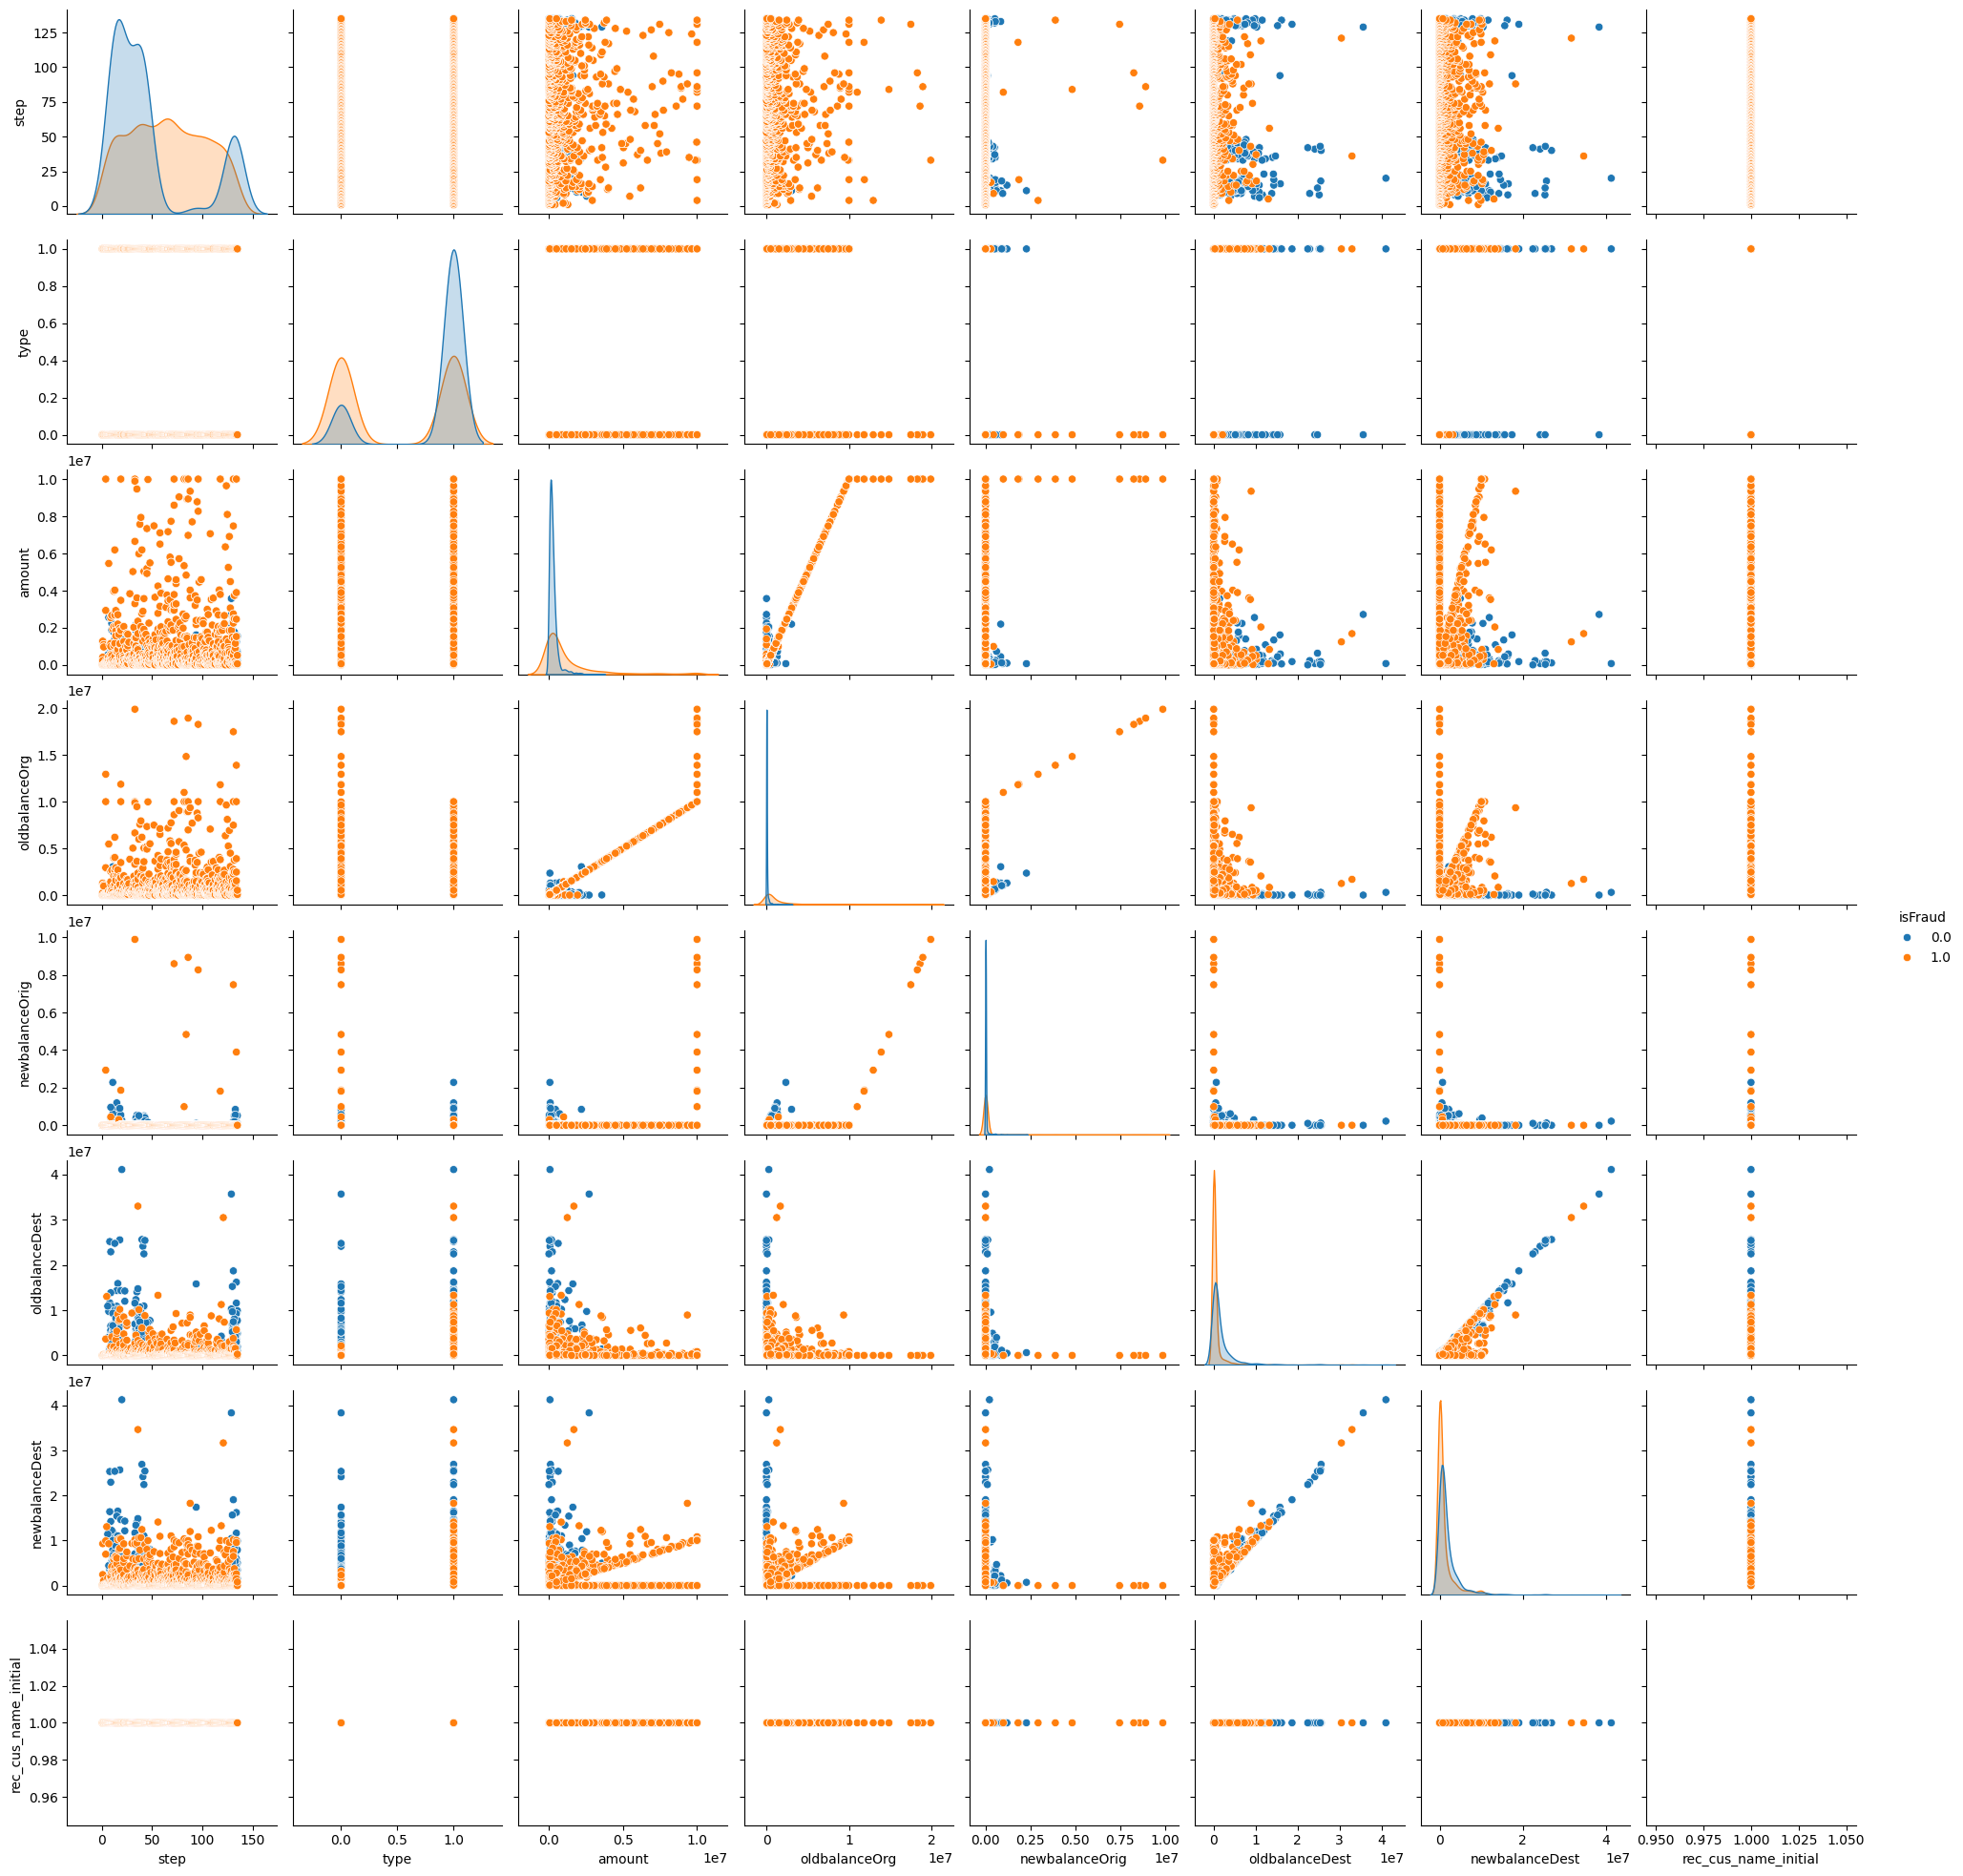

In [88]:
sns.pairplot(pd.merge(X_sample,pd.DataFrame(Y_sample),how="left",left_index=True, right_index=True), hue="isFraud",kind='scatter')

In [89]:
#Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_sample, Y_sample,test_size=0.5,random_state=1,shuffle=True)

In [90]:
len(Y_train)

1542

Logistic Regression

In [91]:
param_grid = {'C':[0.1,1,100,1000]}
grid = GridSearchCV(LogisticRegression(),param_grid)
grid.fit(X_train,Y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 100, 1000]})

In [92]:
lg_model = LogisticRegression(C=0.1,random_state=42)
lg_model.fit(X_train, Y_train)
lg_pred = lg_model.predict(X_test)

print(confusion_matrix(Y_test,lg_pred))
print('\n')
print(classification_report(Y_test,lg_pred))

[[711  54]
 [ 31 746]]


              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94       765
         1.0       0.93      0.96      0.95       777

    accuracy                           0.94      1542
   macro avg       0.95      0.94      0.94      1542
weighted avg       0.95      0.94      0.94      1542



Decision Tree

In [93]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)
dtree_pred = dtree.predict(X_test)

print(confusion_matrix(Y_test,dtree_pred))
print('\n')
print(classification_report(Y_test,dtree_pred))

[[735  30]
 [ 34 743]]


              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       765
         1.0       0.96      0.96      0.96       777

    accuracy                           0.96      1542
   macro avg       0.96      0.96      0.96      1542
weighted avg       0.96      0.96      0.96      1542



Random Forest

In [94]:
rfc = RandomForestClassifier(n_estimators=200,random_state=42)
rfc.fit(X_train,Y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(Y_test,rfc_pred))
print('\n')
print(classification_report(Y_test,rfc_pred))

[[756   9]
 [ 33 744]]


              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       765
         1.0       0.99      0.96      0.97       777

    accuracy                           0.97      1542
   macro avg       0.97      0.97      0.97      1542
weighted avg       0.97      0.97      0.97      1542



In [95]:
#Showing fraud predictions

def make_predictions(data, predictors):
    train, test = train_test_split(X_sample,test_size=0.5,random_state=1,shuffle=True)
    #train = data[data["date"] < '2022-01-01']
    #test = data[data["date"] > '2022-01-01']
    rfc.fit(train[predictors], train["target"])
    preds = rfc.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], predicted=preds), index=test.index)
    error = precision_score(test["target"], preds)
    return combined, error

Naive Bayes

In [96]:
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
gnb_pred = gnb.predict(X_test)

cm_gnb = confusion_matrix(Y_test,gnb_pred)
print(cm_gnb)
print('\n')
print(classification_report(Y_test,gnb_pred))
recall = np.diag(cm_gnb) / np.sum(cm_gnb, axis = 1)
print(recall)

[[735  30]
 [419 358]]


              precision    recall  f1-score   support

         0.0       0.64      0.96      0.77       765
         1.0       0.92      0.46      0.61       777

    accuracy                           0.71      1542
   macro avg       0.78      0.71      0.69      1542
weighted avg       0.78      0.71      0.69      1542

[0.96078431 0.46074646]


**Final Machine Learning Classifier Comparison **

In [97]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(C=1000,random_state=42),
               GaussianNB(),
               DecisionTreeClassifier(random_state=42),
               RandomForestClassifier(n_estimators=200,random_state=42)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results

for cls in classifiers:
    model = cls.fit(X_train, Y_train)
    yproba = model.predict_proba(X_test)[::,1]

    fpr, tpr, _ = roc_curve(Y_test,  yproba)
    auc = roc_auc_score(Y_test, yproba)

    new_data = {'classifiers': [cls.__class__.__name__],
                'fpr': [fpr],
                'tpr': [tpr],
                'auc': [auc]}

 # Convert the list of dictionaries to a DataFrame and then append
    result_table = result_table.append(pd.DataFrame(new_data), ignore_index=True)


# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
print(result_table)

<ipython-input-97-bcebfeed71c3>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append(pd.DataFrame(new_data), ignore_index=True)
<ipython-input-97-bcebfeed71c3>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append(pd.DataFrame(new_data), ignore_index=True)
<ipython-input-97-bcebfeed71c3>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append(pd.DataFrame(new_data), ignore_index=True)


                                                                      fpr  \
classifiers                                                                 
LogisticRegression      [0.0, 0.0, 0.0, 0.0, 0.00130718954248366, 0.00...   
GaussianNB              [0.0, 0.00392156862745098, 0.00392156862745098...   
DecisionTreeClassifier                     [0.0, 0.0392156862745098, 1.0]   
RandomForestClassifier  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                                      tpr  \
classifiers                                                                 
LogisticRegression      [0.0, 0.09137709137709138, 0.09523809523809523...   
GaussianNB              [0.0, 0.2754182754182754, 0.27927927927927926,...   
DecisionTreeClassifier                     [0.0, 0.9472329472329473, 1.0]   
RandomForestClassifier  [0.0, 0.3680823680823681, 0.48133848133848134,...   

                             auc  
classifiers                       
Logi

<ipython-input-97-bcebfeed71c3>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append(pd.DataFrame(new_data), ignore_index=True)


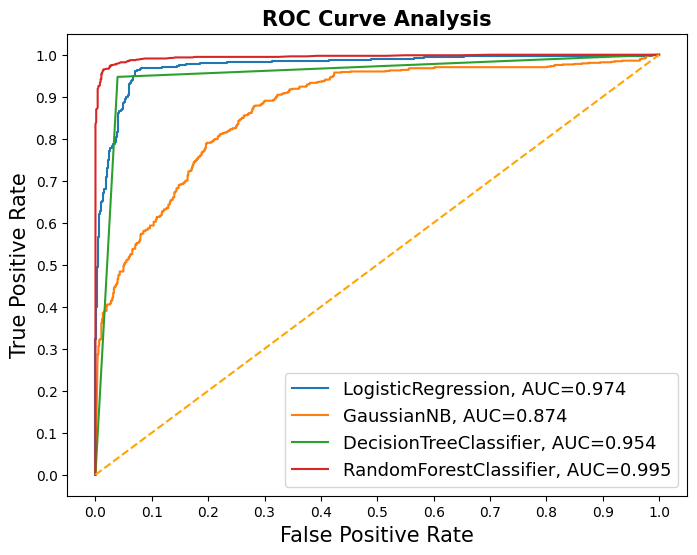

In [98]:
# Plotting ROC curve

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

**Logistic Regression (AUC: 0.972):**

An AUC of 0.972 suggests that the Logistic Regression model has a very good discriminatory power. The closer the AUC is to 1, the better the model is at distinguishing between fraud and non-fraud cases.

**Gaussian Naive Bayes (AUC: 0.882):**

An AUC of 0.882 suggests a reasonably good performance but not as high as Logistic Regression. This model might have a bit lower discriminatory power compared to Logistic Regression.

**Decision Tree Classifier (AUC: 0.981):**

An AUC of 0.981 indicates that the Decision Tree model is performing very well. It has a high ability to discriminate between the fraud and non-fraud cases.

**Random Forest Classifier (AUC: 0.998):**

An AUC of 0.998 suggests an excellent performance. Random Forest, with its ensemble nature, is showing very high discriminatory power between fraud and non-fraud cases.

From the above, **RANDOM FOREST CLASSIFIER** is the best performing model for our dataset and use case.

Below is the the test dataset with fraud predictions using the Random forest classifier as the best model chosen from the models tested.